#### 1. Read the drinks.csv dataset again, this time bringing in the beer_servings sequence into a new series with country again acting as the index. Assign this series to the variable beers.

In [2]:
import pandas as pd

In [3]:
beers = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country','beer_servings'], index_col='country', squeeze=True)

/var/folders/qc/75tc8zq51_zgncdtzy296p400000gn/T/ipykernel_6416/3796080116.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  beers = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country','beer_servings'], index_col='country', squeeze=True)


In [4]:
beers.head(10)

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

#### 2. Calculate the mean, median and std of beers. Is the distribution lef or right skewed?

In [5]:
beers.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

<AxesSubplot:>

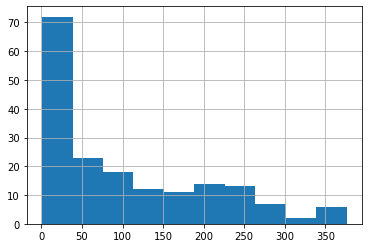

In [6]:
beers.hist()

Right skewed

#### 3. Slice the first 10 countries from beers. Are these relatively large or small relative to the rest of the sample? BONUS: To answer that, we could compare each value to the mean or median. An even better approach would be to calculate standard scores, or z-scores as they are known.

In [7]:
first_ten = beers[:10]

In [11]:
first_ten - beers.mean()

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beer_servings, dtype: float64

In [13]:
(first_ten - beers.mean()).apply(lambda x: 'low' if x<0 else 'high')

country
Afghanistan          high
Albania               low
Algeria               low
Andorra              high
Angola               high
Antigua & Barbuda     low
Argentina            high
Armenia               low
Australia            high
Austria              high
Name: beer_servings, dtype: object

In [14]:
(first_ten - beers.mean()).apply(lambda x: 'low' if x<0 else 'high').value_counts()

high    6
low     4
Name: beer_servings, dtype: int64

#### 4. Create a new series that uses series arithmetics to calculate the z-score for each serving by subtracting from each the mean and dividing the difference by the standard deviation. Poin the variable z_scores to this series. 

#### Which country has the largest absolute z-score? Is this a positive or negative deviation?

In [18]:
z_score = (beers - beers.mean())/beers.std()

In [19]:
z_score

country
Afghanistan         NaN
Albania       -0.137818
Algeria       -0.773712
Andorra        1.412174
Angola         1.133970
                 ...   
Venezuela      2.286528
Vietnam        0.080771
Yemen         -0.962493
Zambia        -0.704161
Zimbabwe      -0.386214
Name: beer_servings, Length: 193, dtype: float64